In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cap = pd.read_csv('CCs Cap.csv', index_col=0)
price = pd.read_csv('CCs Price.csv', index_col=0)
volume = pd.read_csv('CCs Volume.csv', index_col=0)

cap.index = pd.to_datetime(cap.index)
price.index = pd.to_datetime(price.index)
volume.index = pd.to_datetime(volume.index)

In [3]:
base_date = price.index[0]
cap_base = cap.loc[base_date]
weights = cap_base / cap_base.sum()

price_base = price.loc[base_date]
denom = (price_base * weights).sum()

In [14]:
weekly_cap = cap.resample('W').last()
weekly_price = price.resample('W').last()

week_dates = weekly_price.index

cci = pd.Series(index=week_dates, dtype=float)
cci.iloc[0] = 100

In [18]:
for i in range(len(week_dates) - 1):
    t_current = week_dates[i]
    t_next = week_dates[i+1]
    
    cap_current = weekly_cap.loc[t_current]
    top5 = cap_current.sort_values(ascending=False).iloc[:5].index.tolist()
    
    cap_top5 = cap_current[top5]
    weights = cap_top5 / cap_top5.sum()
    
    price_current = weekly_price.loc[t_current, top5]
    base_value = (price_current * weights).sum()
    
    price_next = weekly_price.loc[t_next, top5]
    period_value = (price_next * weights).sum()
    
    ratio = period_value / base_value
    cci.loc[t_next] = cci.loc[t_current] * ratio

cci = cci.to_frame(name='CCI').rename_axis('Date')
cci.to_csv('CCI.csv')

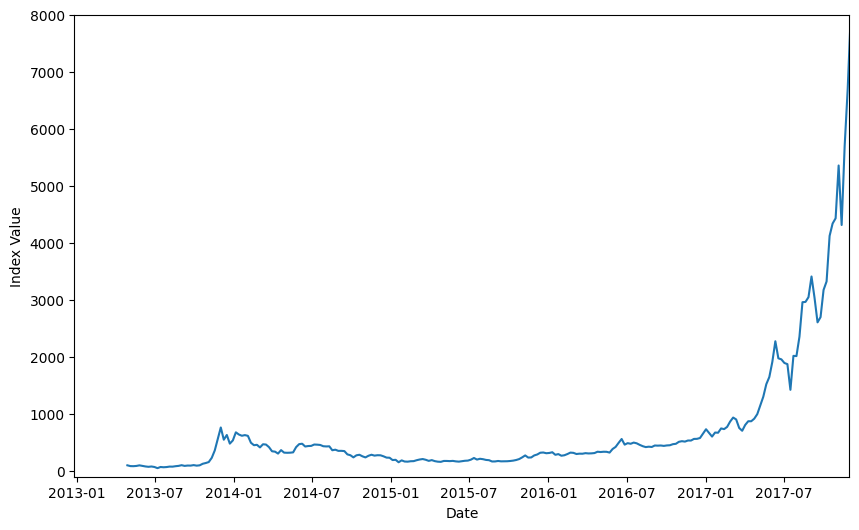

In [19]:
plt.figure(figsize=(10,6))
plt.plot(cci)
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.xlim(15700, 17500)
plt.ylim(-100, 8000)
plt.show()